# HR Analytics Project- Understanding the Attrition in HR

###### **Batch - DS0422**
###### **Submitted by - Akash Shrivastava**
***

### **Problem Statement**

**Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?**

###### **HR Analytics**

*Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.*

###### **Attrition in HR**

*Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.*

**How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.**

###### **Attrition affecting Companies**

*A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.*

 

###### Note: You can find the dataset in the link below.

###### Downlaod Files:
*https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics*

***

- ######  Importing required libraries for performing EDA,Data Wrangling and Data Cleaning

In [1]:
import numpy as np  #---- for computation
import pandas as pd #---- for dataframe dependencies

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# for stats
from scipy import stats

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing casestudy dataset (.csv file)
df=pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
print('No. Of Rows -',df.shape[0])
print('No. Of Columns -',df.shape[1])

No. Of Rows - 1470
No. Of Columns - 35


In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
# As we have 35 columns let us sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

###### Comment -

- **In HR dataset we have 1470 rows and 35 columns.**
- **We have 9 features with object datatypes and rest are int64 out of 35 columns.**
- **Non-null count is same for all Columns, so it seem that it contain No missing value. Still we need to perform Data integrity Check for null values in form of "-","NA" , any duplicate entry or error in Data.**
- **Among all Numeric Variables 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' are ordinal variable. Unique range of all these ordinal Variable need to check.**
- **Target variable is 'Attrition'.**

###### These Ordinary features come with the following label encoding - 

- *Education: 1- 'Below College' , 2 -'College', 3 -'Bachelor', 4- 'Master' ,5 -'Doctor'*
- *EnvironmentSatisfaction: 1- 'Low', 2- 'Medium', 3 -'High', 4- 'Very High'*
- *JobInvolvement: 1 -'Low', 2- 'Medium', 3- 'High', 4- 'Very High'*
- *JobSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4 -'Very High'*
- *PerformanceRating: 1- 'Low', 2- 'Average', 3 -'Good', 4- 'Excellent', 5- 'Outstanding'*
- *RelationshipSatisfaction: 1- 'Low', 2- 'Medium', 3- 'High', 4- 'Very High'*
- *WorkLifeBalance: 1- 'Bad', 2- 'Good', 3- 'Better', 4- 'Best*

## Statistical Analysis 

### Checking Data Integrity

**since data set is large,we will check any en and also find missing values.try which is repeated or duplicated in dataset**

In [10]:
df.duplicated().sum()

0

In [11]:
from imblearn.over_sampling import SMOTE

### Checking Missing Values

In [12]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                          Missing Values  % Missing data
Age                                    0             0.0
StandardHours                          0             0.0
NumCompaniesWorked                     0             0.0
Over18                                 0             0.0
OverTime                               0             0.0
PercentSalaryHike                      0             0.0
PerformanceRating                      0             0.0
RelationshipSatisfaction               0             0.0
StockOptionLevel                       0             0.0
MonthlyIncome                          0             0.0
TotalWorkingYears                      0             0.0
TrainingTimesLastYear                  0             0.0
WorkLifeBalance                        0             0.0
YearsAtCompany                         0             0.0
YearsInCurrentRole                     0             0.0
YearsSinceLastPromotion                0             0.0
MonthlyRate                    

##### Comment -  **There is no missing data and duplicate values in the dataset.**

## Statistical Matrix

<AxesSubplot:>

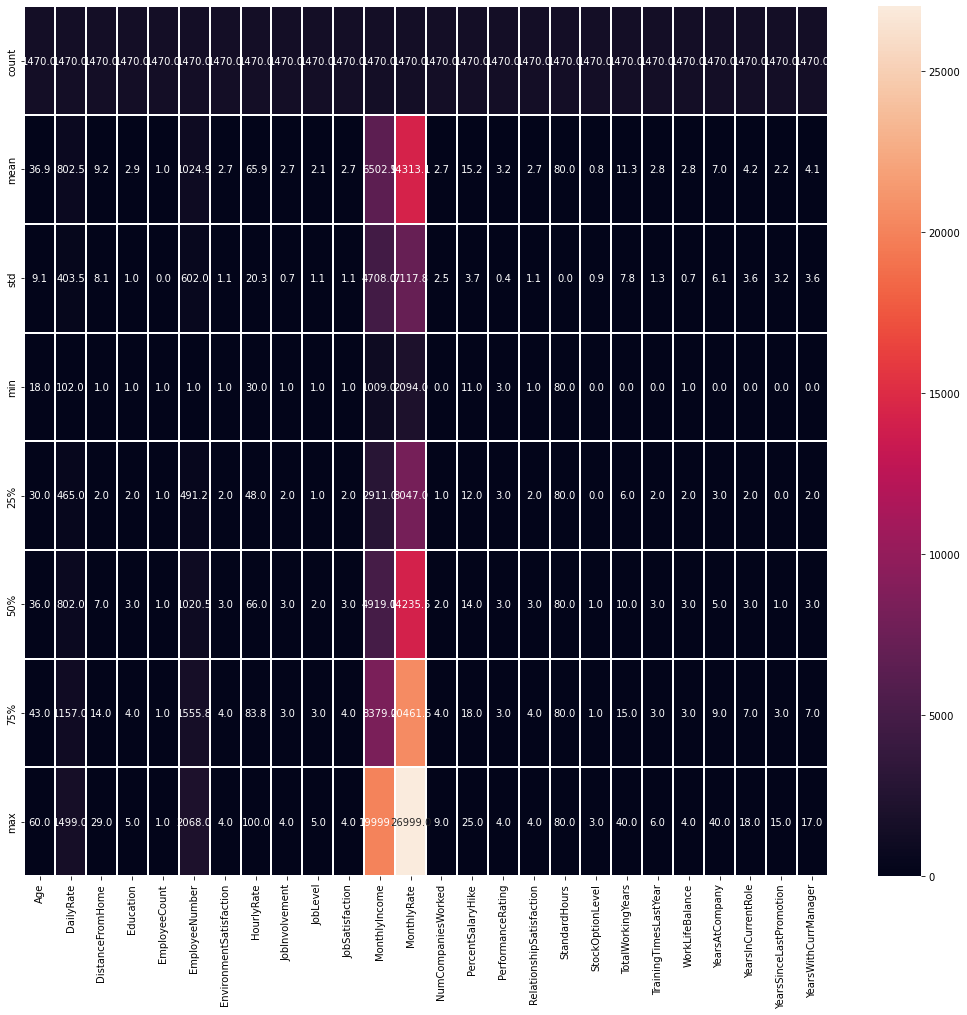

In [13]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(18,16))
sns.heatmap(df.describe(),linewidths = 0.1, fmt='0.1f',annot = True)

In [14]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.924,9.135,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.486,403.509,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.193,8.107,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.913,1.024,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000,0.000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865,602.024,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.722,1.093,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891,20.329,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.730,0.712,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.064,1.107,1.0,1.00,2.0,3.00,5.0


##### Comment - 

- **Minimum Empolyee Age is 18 and Maximum age of employee 60.**
- **Average distance from home is 9.1 KM. It means that most of employee travel atleast 18 KM in day from home to office.**
- **On Average performance Rating of employees is 3.163 with min value 3.0. This Means that performance of most of employee is 'Good'.This implies that Attrition of Employee with 'Outstanding' or 5 rating need to investigate.**
- **50% of Employees has worked atleast 2 companies previously.**
- **For Monthly Income,Monthly Rate by looking at 50% and max column we can say outliers exist in this feature.**
- **By looking at Mean and Median we see that some of the features are skew in nature.**
- **For ordinal features statstical terminology of mean, median, std deviation doesnot make sense.**
- **StandardHours and EmployeeCount contain same value for all stastical parameter. It means they contain one unique value.**

In [15]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

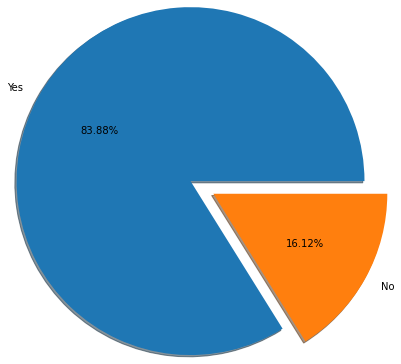

In [16]:
labels = 'Yes','No',
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =2,autopct = '%2.2f%%',explode =[0.1,0.2],shadow=True)
plt.show()

##### Comment - 

*83.88% (1237 employees) Employees did not leave the organization while 16.12% (237 employees) did leave the organization making our dataset to be considerebly imbalance since more people stay in the organization than those who actually left the organization.*

###### Now let us gather more insights on individual categories i.e distribution of diiferent subcategories, Human Resource in an organization like education,job level,working domain.

In [17]:
category=['Attrition','BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for i in category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender
Male      882
Female    588
Name: Gender, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtyp

##### Enlisting Value counts & Sub-categories of different categorial features 

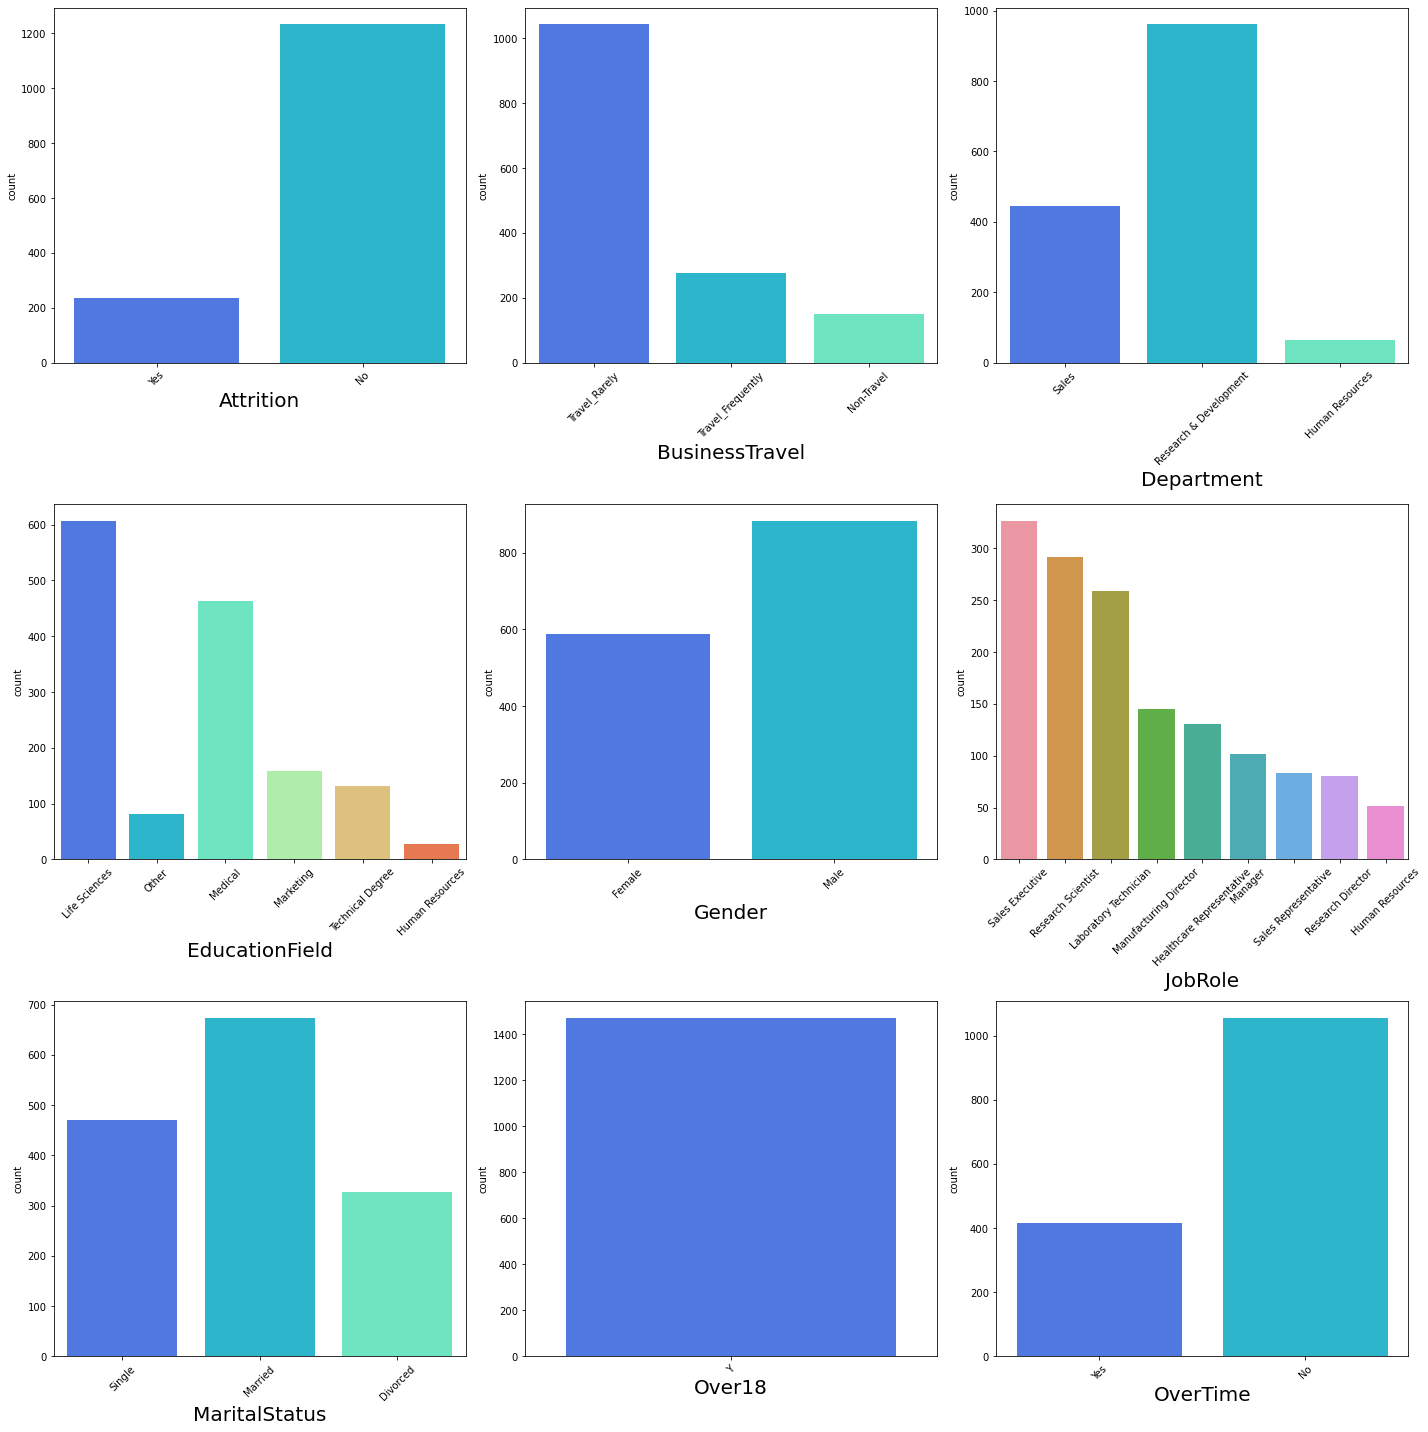

In [18]:
sns.set_palette('rainbow')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
category=['Attrition','BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for i in category:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=45)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

##### Enlisting Value counts & Sub-categories of different Ordinal features

In [19]:
ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in ordinal:
    print (i)
    print(df[i].value_counts())
    print("="*100)

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64
PerformanceRating
3    1244
4     226
Name: PerformanceRating, dtype: int64
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


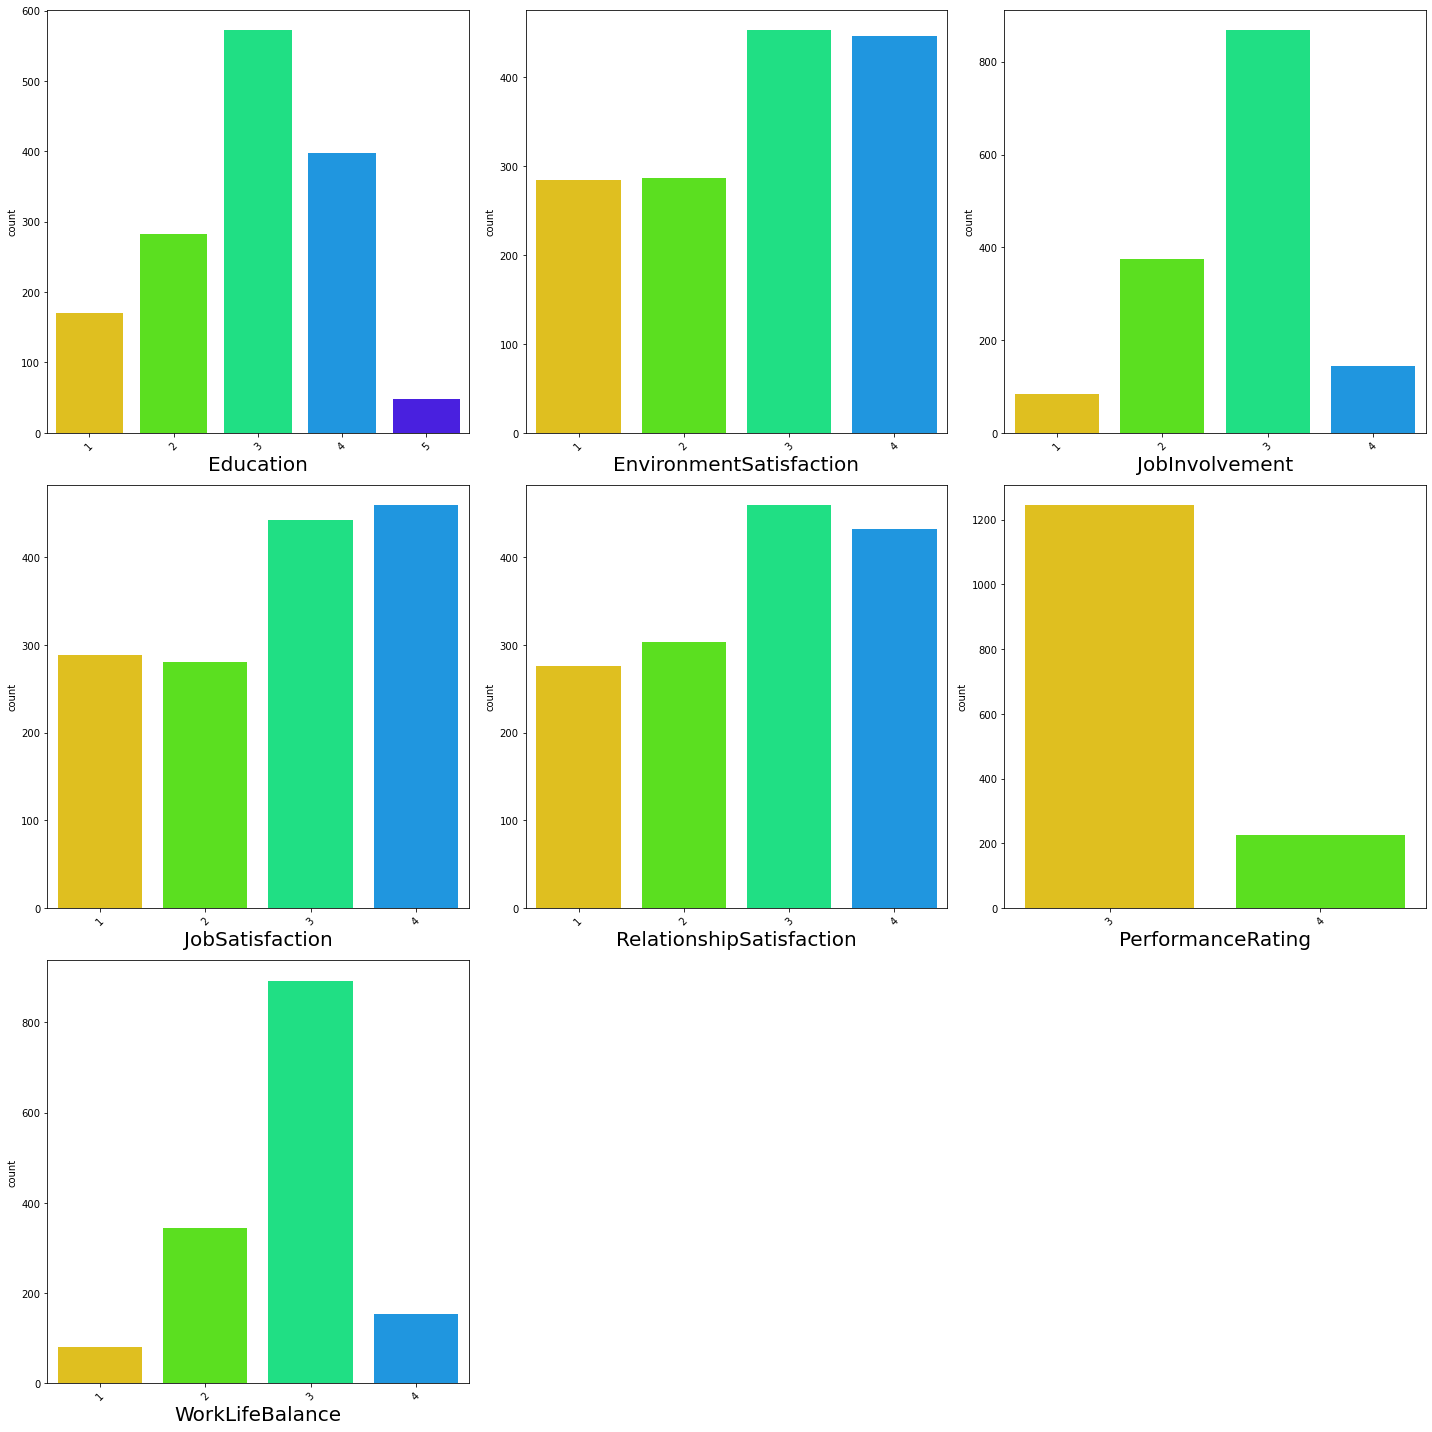

In [20]:
sns.set_palette('hsv')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]

for i in ordinal:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=45)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

##### Educational level man power available 

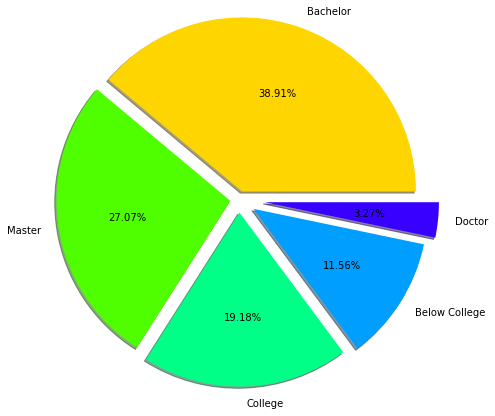

In [21]:
labels = 'Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels = labels,radius =2,autopct = '%2.2f%%',explode =[0.1,0.1,0.15,0.2,0.3],shadow=True)
plt.show()

##### Comment -

- *More than 60 % employees educated at Masters & Bachelor.*
- *30 % of Employees are highly educated in master and doctor degree.*
- *39 % of Employees are graduates.*
- *Almost 19% Employees are educated upto college & 12% are below college.*

###### Let us gather insights on which department HR belongs and education needed for each department through visualization.

In [22]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

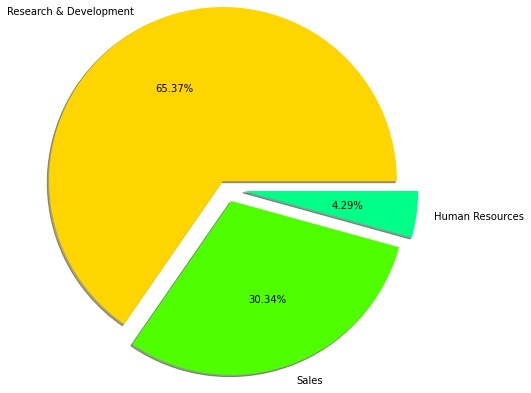

In [23]:
labels = 'Research & Development','Sales','Human Resources'
fig, ax = plt.subplots()
ax.pie(df['Department'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',explode =[0.1,0.15,0.2],shadow=True)
plt.show()

In [24]:
pd.crosstab([df.Education],[df.Department],margins=True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


##### Comment -

- *65.37% of Employees belong to Research & Development Department. Out of  961 Employee in total. Number of employee educated at Bachelors,Masters, Doctor are 379,255 and 30 respectively.*
- *There are only 63 Employee work in HR department.*

In [25]:
pd.crosstab([df.Education],[df.Department,df.Attrition],margins=True).style.background_gradient(cmap='summer_r')

###### Employee distribution according to education field and level of education.

In [26]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

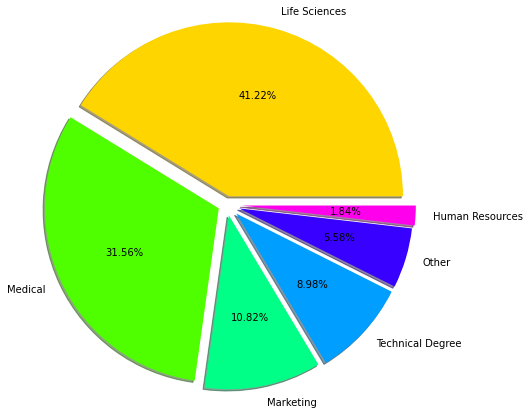

In [27]:
labels = 'Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig, ax = plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',explode =[0.1,0.1,0.125,0.15,0.15,0.175],shadow=True)
plt.show()

In [28]:
# let us check distribution of educcation VS education Field
pd.crosstab([df.Education],[df.EducationField],margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [29]:
# let us check distribution of department VS education Field
pd.crosstab([df.Department],[df.EducationField],margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


###### Comment - 

- *41.22 % Employee comes from Life science background followed by Medical profession with 31.56%.*
- *There are only 27 people with HR background and We know that 63 people work in HR Department from previous result. This implies that atleast half employee working in HR department do not have HR background. This important as there is more probability of Employees Retention is when they are working in domain of interest or as per their education background. Dissatisfaction with want we doing can be seen as major reason of leaving job.*
- *Most of Employees with Techanical degree are Bachelors.*
- *Most of Employees having Masters and Doctors belong to Life Science and Medical domain.*
- R&D department almost everyone comes from profession or technical background except support staff. Factors like Salary Hike, travelling, overtime and Job level are things need to taken in consideration while analysing Attrition of this category.*
- *There are 159 Employee with Marketing background and all work in Sales Department.*
- *50% Employees in sales department have background of Life sciences & Medical. So it will be interesting to see attrition rate in these employees.*

**We will Analyse Attrition over above insight in next section of Job role**

- ######  Job role

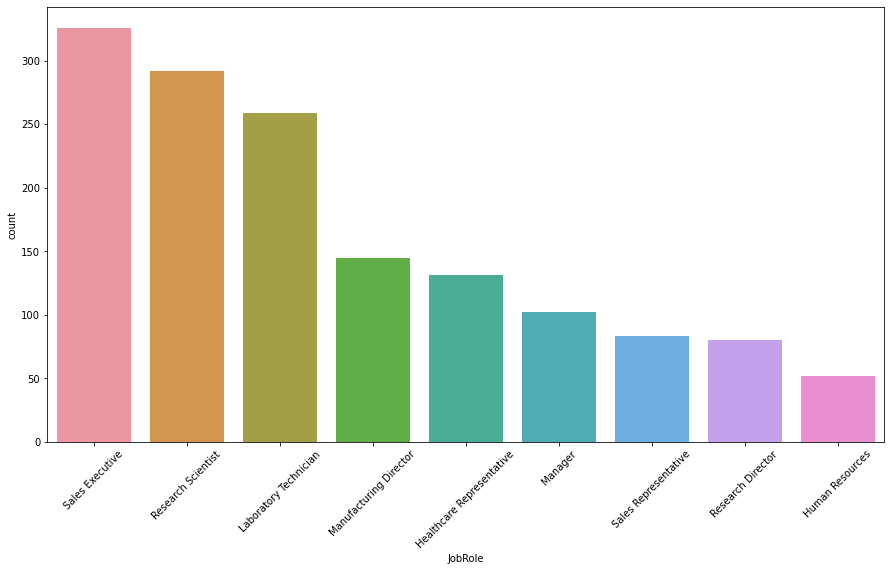

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(df['JobRole'])
plt.xticks(rotation=45)
plt.show()

In [31]:
# let us check distribution of jobrole VS department
pd.crosstab([df.JobRole],[df.Department],margins=True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


###### Comment - 

- *There are 3 job role in HR Department, maximum of which are sales Executive with 446 Total Employees.*
- *Human Resources department has 2 Job role i.e. HR & Manager.*
- *There are 6 different Job role in R&D department with total 961 employees and until now we know that all of them belong to thier respective domain background.*


- ###### Attrition by job role 

<Figure size 936x720 with 0 Axes>

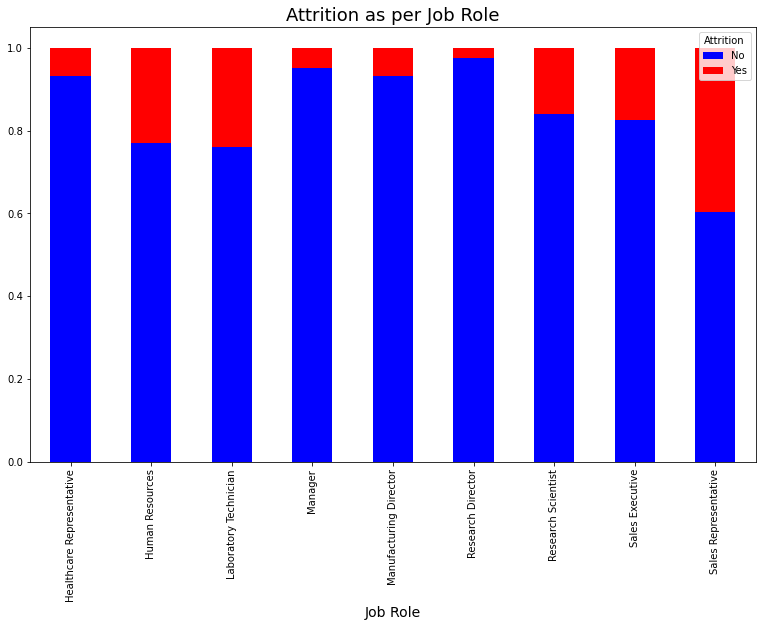

In [32]:
plt.figure(figsize=(13,10))
data=pd.crosstab(df['JobRole'],df['Attrition'])
data.div(data.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True,
                                               color=['blue','red'],figsize=(13,8))
plt.title('Attrition as per Job Role', fontsize=18)
plt.xlabel('Job Role',fontsize=14)
plt.show()

###### In above barplot we can observe red signal foor different Managers & HR for respective job role .

*Barplot shows perentage of attrition across each job role, now let us check number of matrix of attrition again using crosstab.*

In [33]:
# let us check distribution of jobrole VS department
pd.crosstab([df.JobRole,df.Department],[df.Attrition],margins=True).style.background_gradient(cmap='gist_rainbow_r')

###### Comment - 

- *Percentage of attrition is high in Sales Representative,Laboratory Technician,Human Resources. This all job roles comes at bottom in corporate hierachy also Salary is comparatively less compare to other job role.*
- *Monthly Income, Job stastifation, travelling are feature need to dive into for further insights in these job role.*
- *At the Top chart 62 Laboratory Technician has resign from job, followed by 57 sales executive and 47 Research Scientist.*
- *16 % arttrition rate for Research Scientist, which involve huge investment from company. Company not only loses employee but its knowledge base, expertise & Intellectual property rights in some cases.*

In [34]:
#grouping Numeric Features
# Grouping Numeric Features
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

### Violinplot of Numeric Variables

In [35]:
# Grouping Numeric Features
Num_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


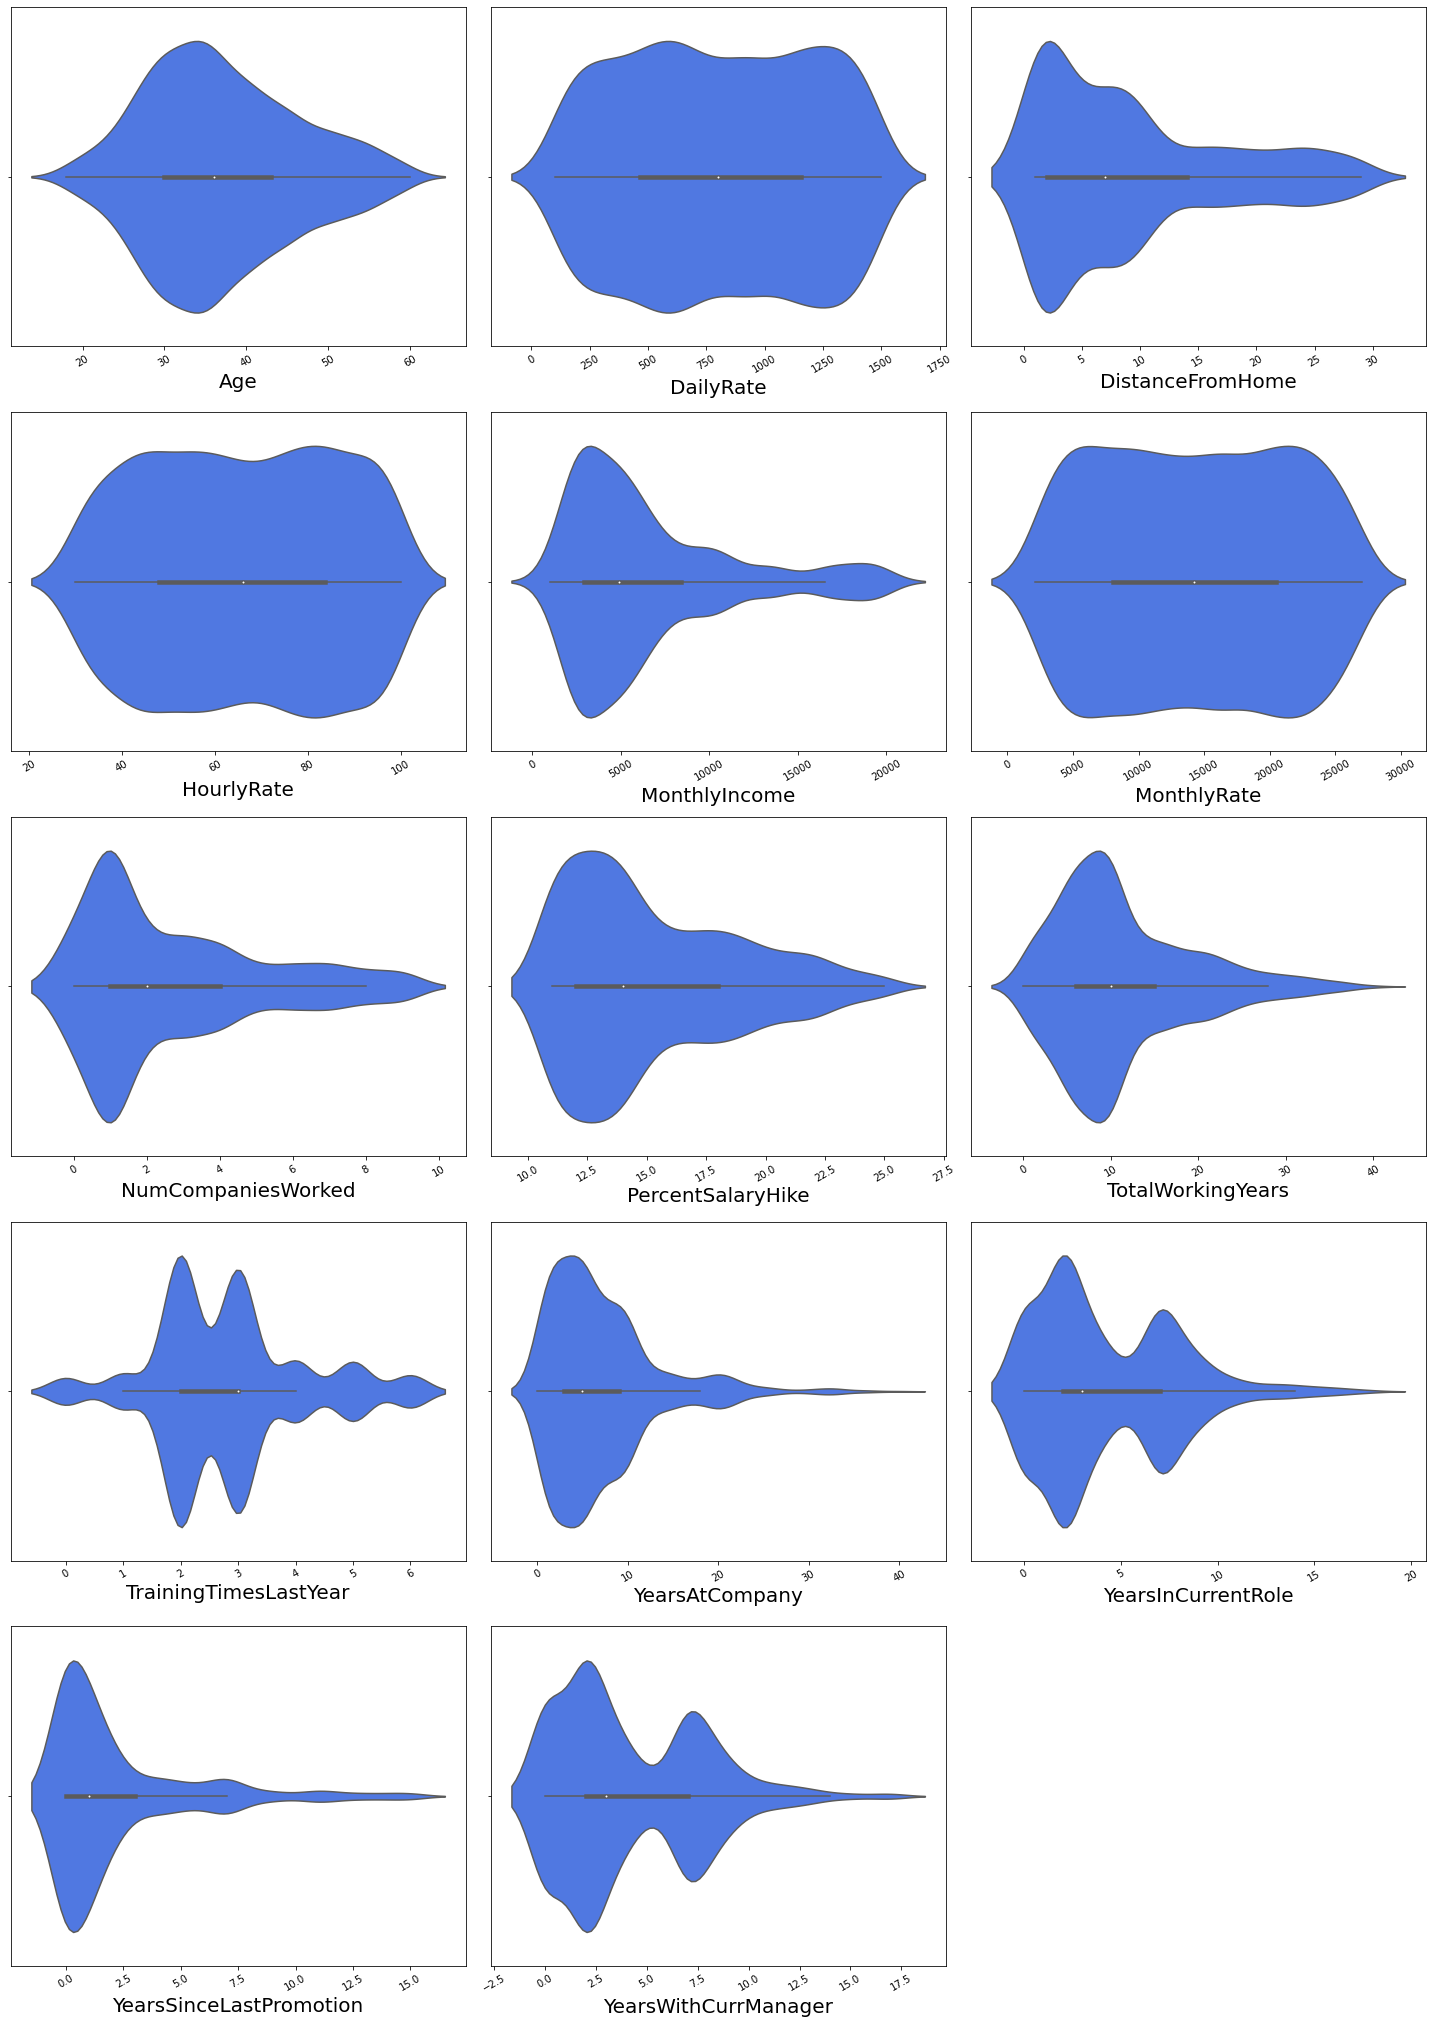

In [36]:
sns.set_palette('rainbow')
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1
for i in Num_int :
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.violinplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

##### Comment - 

- *For Majority of people have spend 3 to 10 years at company.*
- *Most of people staying company upto 2 years after promotion.*
- *Majority of people are trained 2-3 times in last year.If employees* leaves job then it is loss making investment for company.*
- *Majority of people works in  same position for maximum 4 yrs.*
- *Majority of Employees have salary hike of 10 to 15%.*

- ##### Age Vs Attrition

<AxesSubplot:xlabel='Age', ylabel='count'>

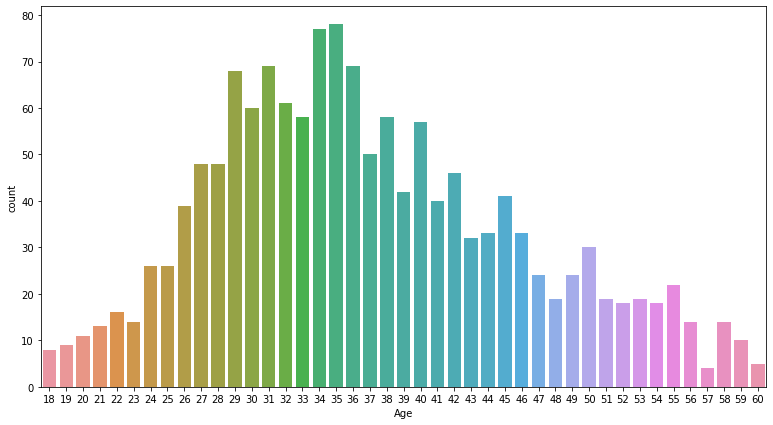

In [37]:
plt.subplots(figsize=(13,7))
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

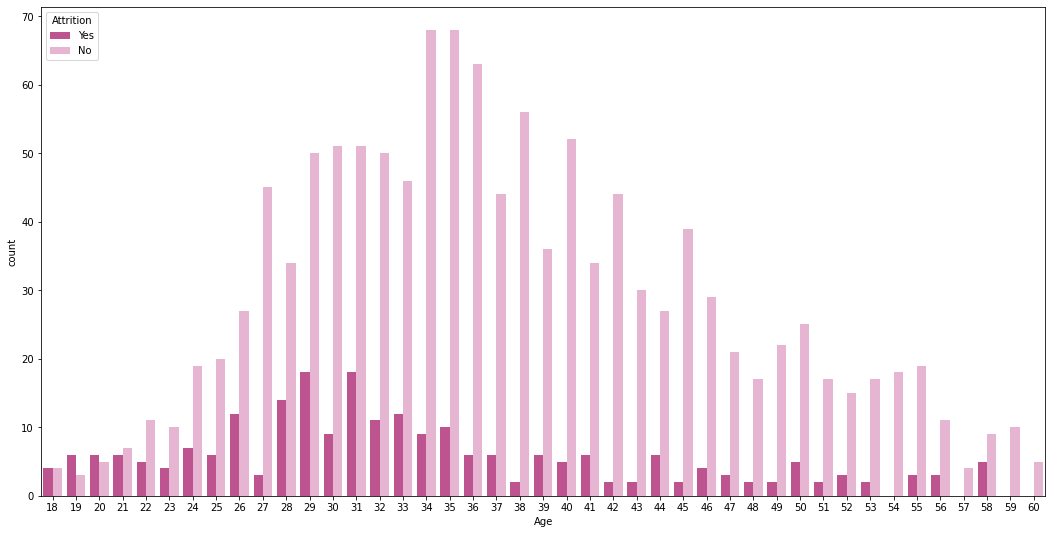

In [38]:
sns.set_palette('PiYG')
plt.subplots(figsize=(18,9))
sns.countplot(df['Age'],hue='Attrition', data=df)

##### Comment -

- **The Attrition rate is minimum between 34 and 35 years old age group.**
- **The Attrition rate is maximum between 29 and 31 years old age group.**

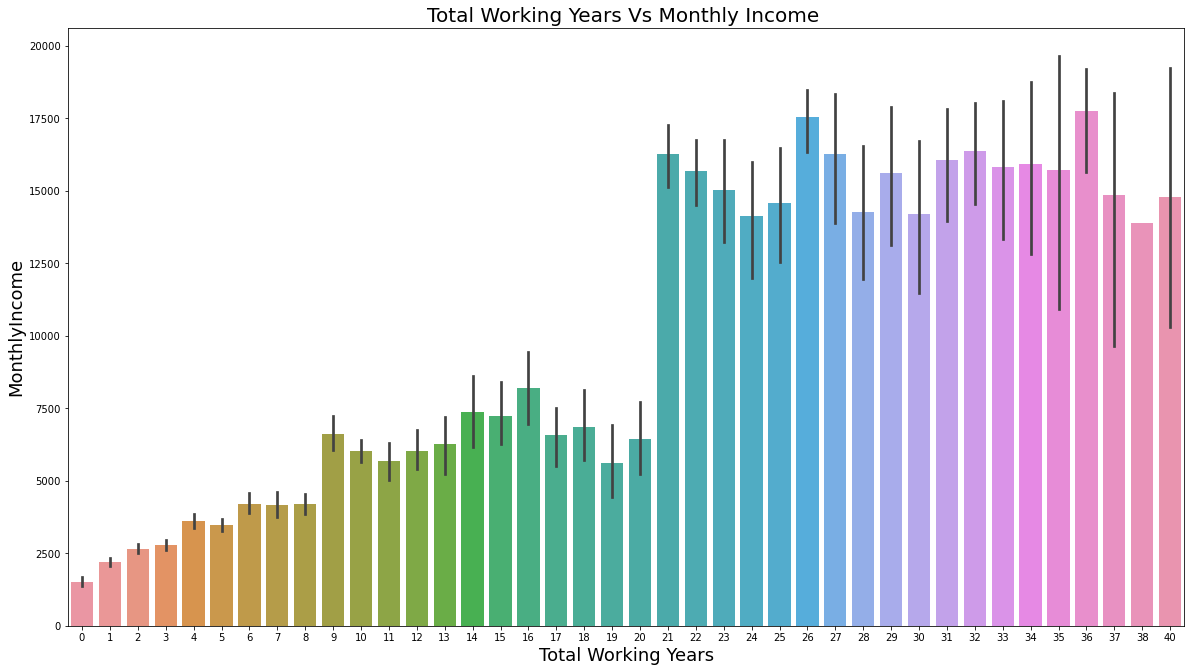

In [39]:
plt.figure(figsize=(20,11))
sns.barplot(df['TotalWorkingYears'],df['MonthlyIncome'])
plt.xlabel('Total Working Years',fontsize=18)
plt.ylabel('MonthlyIncome',fontsize=18)
plt.title('Total Working Years Vs Monthly Income ', fontsize=20)
plt.show()

###### Comment - Monthly income is highest for employees working 21 or more number of total workin years.

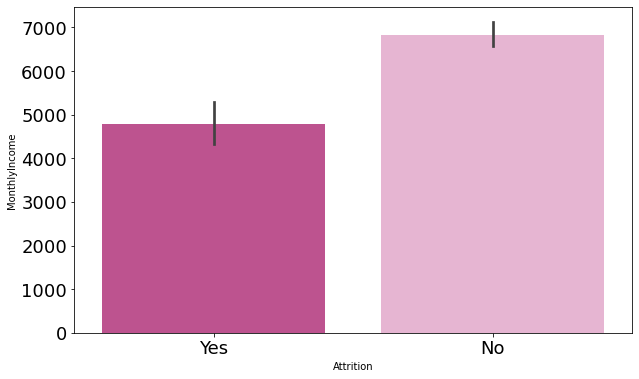

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

###### Comment - The Attrition rate in the employees is less when monthly income reaches to 6900.

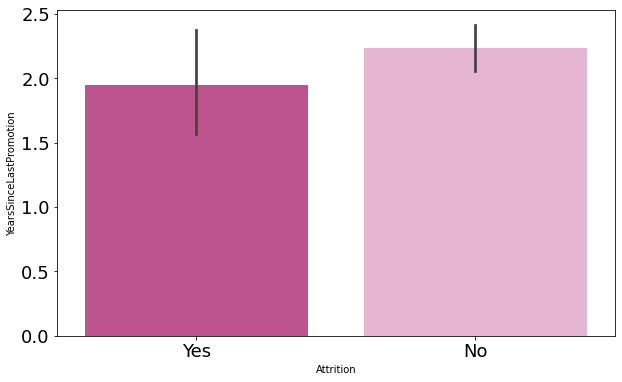

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

###### Comment - The rate of Attrition is high when the employee did not got promoted since 1.8 years.

## Encoding Categorical Data 

In [42]:
# using Label encoder on target variable 'Attrition'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [43]:
#dropping unnecessary columns

In [44]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1 , inplace=True)

In [45]:
df.shape

(1470, 31)

In [46]:
#Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
o = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = o.fit_transform(df[column])
    return df

o_col = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
df=ordinal_encode(df,o_col)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


## Outliers Detection and Removal

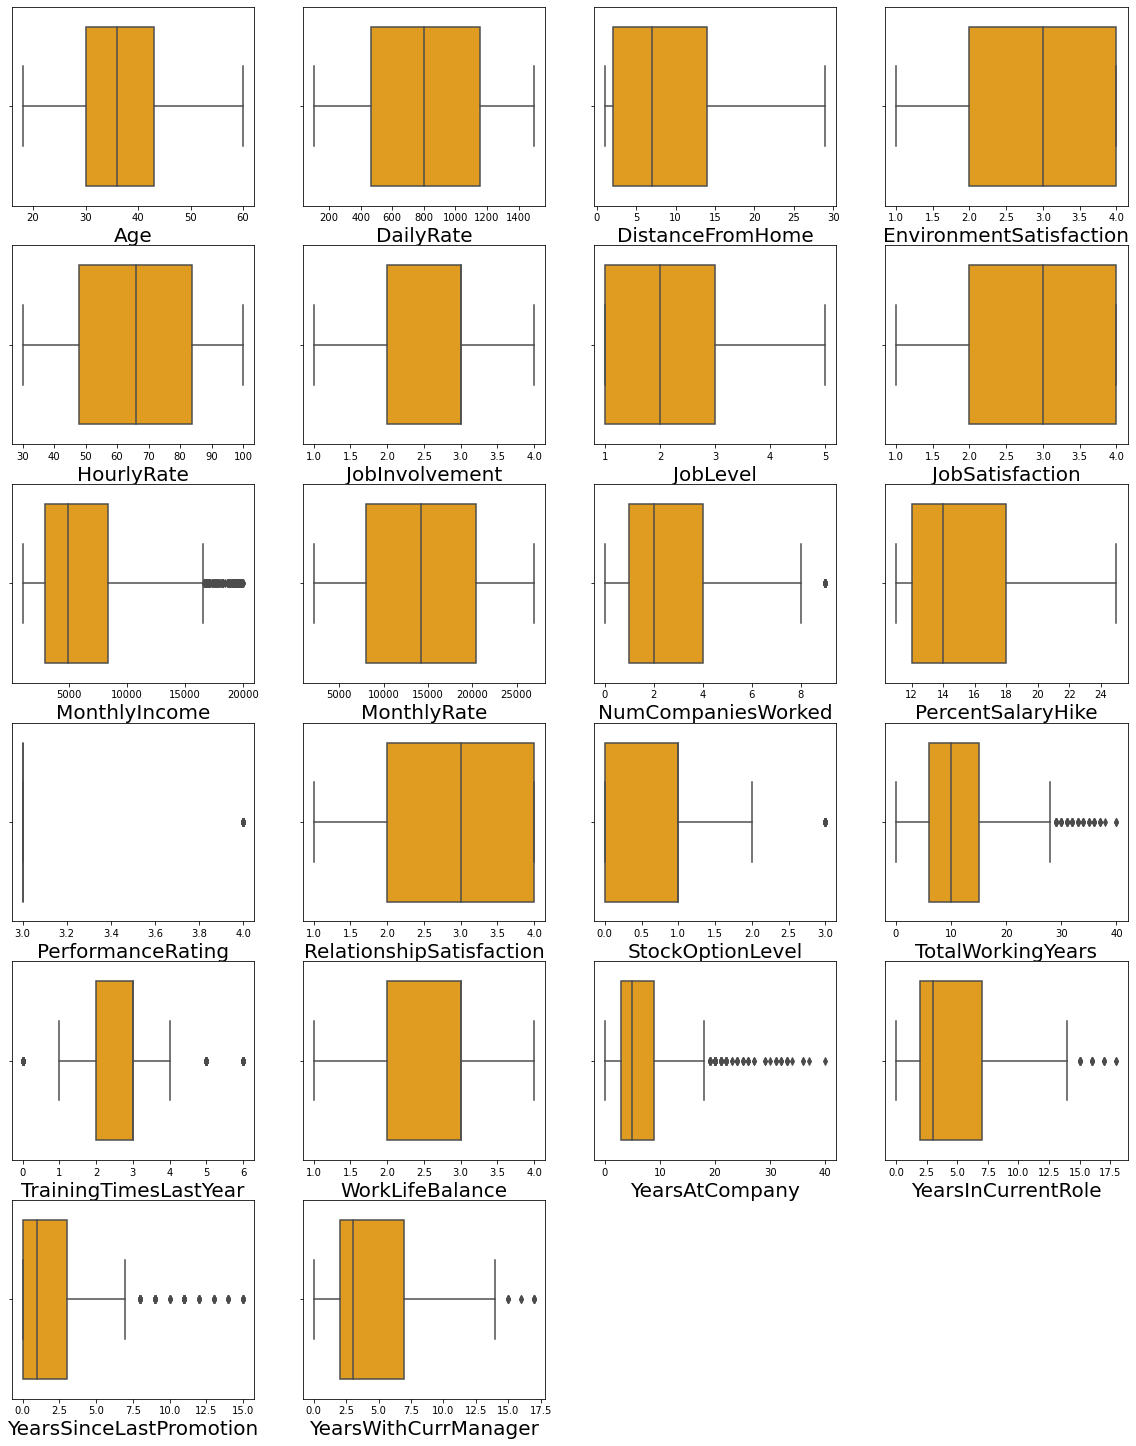

In [47]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in Numeric:
    if plotnumber <=28:
        ax = plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column], color='orange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

###### Comment - Features containing outliers-

"MonthlyIncome", "NumCompaniesWorked", "PerformanceRating", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition"

In [48]:
from scipy.stats import zscore
z =np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis=1)]

print('Shape of the dataframe before removing outliers -',df.shape)
print('Shape of the dataframe after removing outliers -',df1.shape)

df=df1.copy() #reassigning the changed Dataframe name to our Dataframe name

Shape of the dataframe before removing outliers - (1470, 31)
Shape of the dataframe after removing outliers - (1387, 31)


###### Data Loss

In [49]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1470-1387)/1470)*100,'%')

Percentage Data Loss : 5.646258503401361 %


### Skewness of Features

In [50]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [51]:
# Splitting data in target and dependent feature
X = df.drop(['Attrition'],axis=1)
Y = df['Attrition']

- #### Transforming skew data using power transform

In [52]:
from sklearn.preprocessing import power_transform
df = power_transform(X)
df = pd.DataFrame(df,columns=X.columns)
df.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

##### Comment - 

- *For Numeric features skewness is transform within permissible limit.*
- *For ordinal features & categorical features skew parameter irrevalent*

In [53]:
df.drop(['PerformanceRating'],axis=1,inplace=True)

### Correlation

In [56]:
df.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.019607,0.019864,-0.036344,-0.025855,0.215520,-0.037564,0.013967,-0.037163,0.026203,...,0.010488,0.037296,0.089449,0.652405,-0.014951,-0.016180,0.207538,0.145404,0.114162,0.142446
BusinessTravel,0.019607,1.000000,-0.001984,-0.003560,-0.007041,-0.006468,0.034658,0.004183,-0.011439,0.026364,...,-0.019175,-0.036165,-0.006092,0.027298,0.006192,-0.017977,-0.024021,-0.035610,-0.033148,-0.032665
DailyRate,0.019864,-0.001984,1.000000,-0.003546,-0.006034,-0.017504,0.040993,0.034324,-0.003271,0.015156,...,0.029183,0.005771,0.049415,0.042750,0.005118,-0.046550,0.005391,0.022143,-0.035448,0.005908
Department,-0.036344,-0.003560,-0.003546,1.000000,0.037834,0.012780,0.082525,-0.013867,-0.030950,-0.000623,...,-0.013541,-0.037572,-0.000630,-0.006833,0.039938,0.017807,0.025457,0.057817,0.017699,0.024241
DistanceFromHome,-0.025855,-0.007041,-0.006034,0.037834,1.000000,0.002714,0.021074,-0.013409,0.010557,0.015607,...,0.034946,0.009379,0.027082,-0.012129,-0.015334,-0.030011,0.006570,0.013091,-0.003873,-0.002310
Education,0.215520,-0.006468,-0.017504,0.012780,0.002714,1.000000,-0.038405,-0.026095,-0.017807,0.011105,...,-0.002095,-0.004863,0.025621,0.150720,-0.023039,0.010164,0.037921,0.051072,0.016076,0.026651
EducationField,-0.037564,0.034658,0.040993,0.082525,0.021074,-0.038405,1.000000,0.042609,0.005059,-0.004372,...,0.000812,-0.018254,-0.012936,-0.001827,0.054321,0.034788,0.004483,0.004372,0.023062,0.028189
EnvironmentSatisfaction,0.013967,0.004183,0.034324,-0.013867,-0.013409,-0.026095,0.042609,1.000000,-0.014940,-0.042512,...,-0.027743,0.016892,0.024345,-0.013356,-0.018350,0.030422,0.012338,0.029218,0.038031,0.006417
Gender,-0.037163,-0.011439,-0.003271,-0.030950,0.010557,-0.017807,0.005059,-0.014940,1.000000,0.005618,...,0.010984,0.041439,0.024390,-0.049776,-0.039213,0.002726,-0.046018,-0.028101,-0.016131,-0.027972
HourlyRate,0.026203,0.026364,0.015156,-0.000623,0.015607,0.011105,-0.004372,-0.042512,0.005618,1.000000,...,-0.015826,0.005207,0.041329,-0.012902,-0.018396,-0.013811,-0.032827,-0.035899,-0.062271,-0.022931


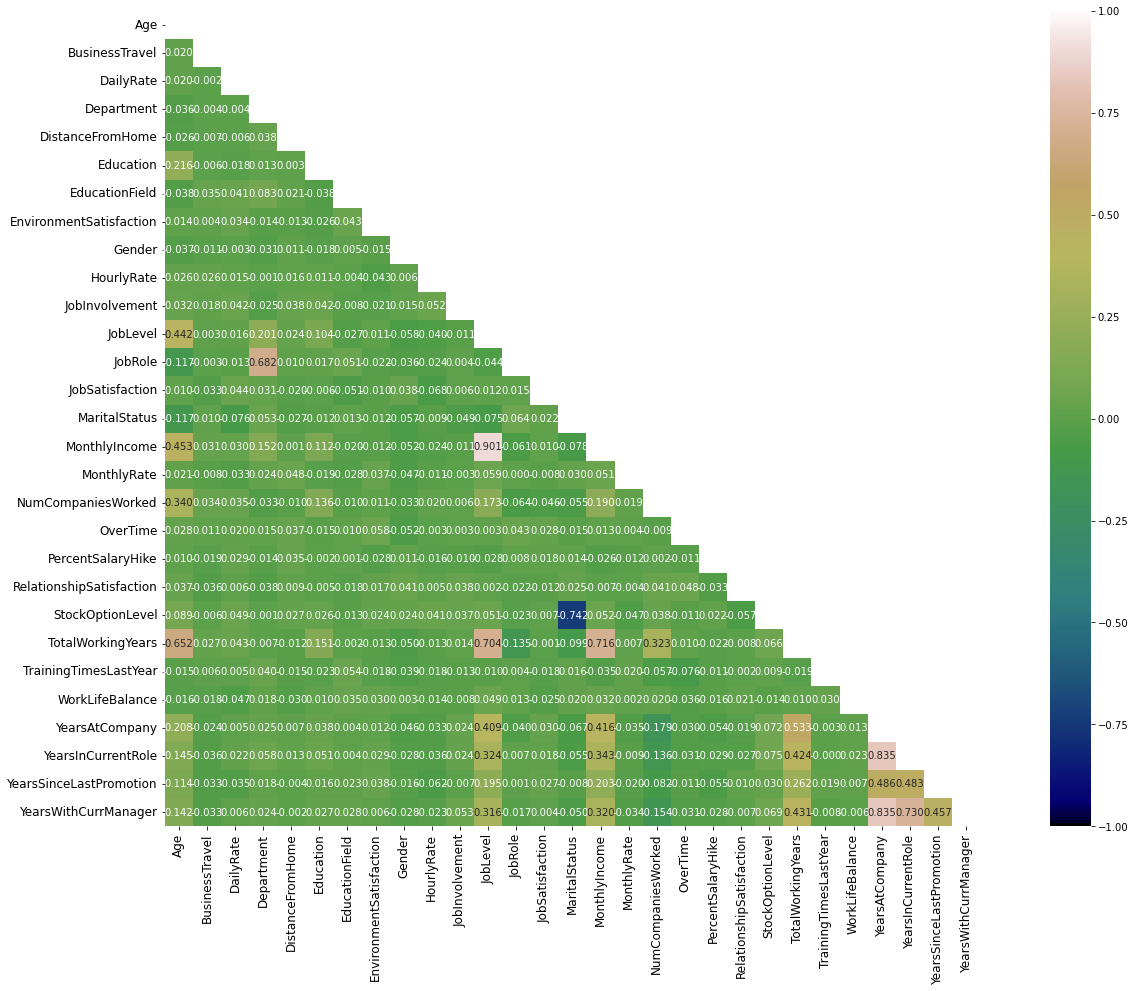

In [57]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,square=True, fmt='0.3f', annot_kws={'size':10},  cmap='gist_earth',mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

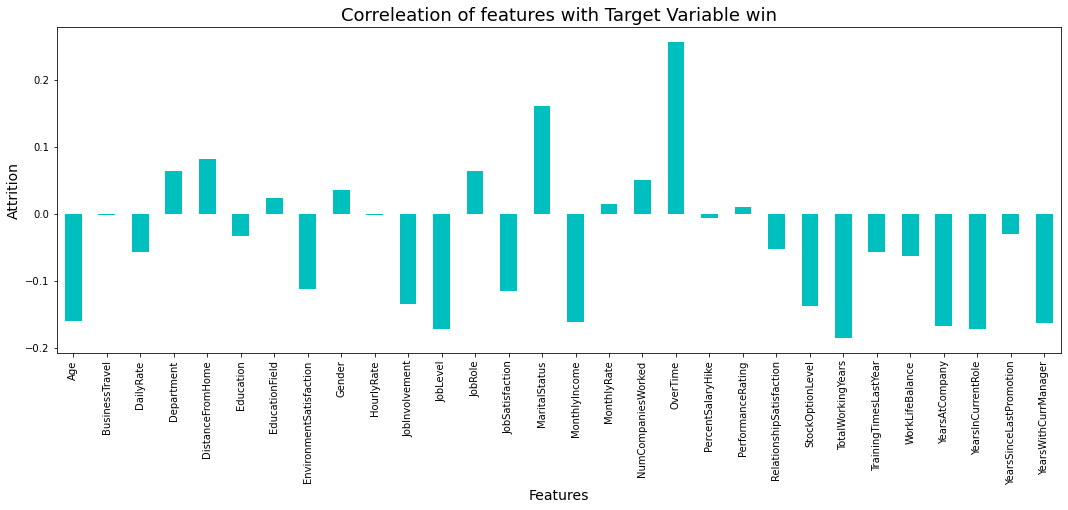

In [58]:
plt.figure(figsize=(18,6))
df1.corr()['Attrition'].drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Attrition',fontsize=14)
plt.title('Correleation of features with Target Variable win',fontsize=18)
plt.show()

##### Comment -

- *Age, JobLevel, MonthlyIncome is highly positively correlated with TotalWorkingYears.*
- *JobLevel is highly positively correlated with the MonthlyIncome.*
- *PercentSalaryHike is highly positively correlated with the column PerformanceRating.*

### Checking Multicollinearity between features using variance_inflation_factor

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df1.values,i)for i in range(df.shape[1])]
vif['Features']=df.columns
vif

,VIF,Features
0,30.994586,Age
1,1.520532,BusinessTravel
2,6.669133,DailyRate
3,5.041636,Department
4,13.932479,DistanceFromHome
5,2.342119,Education
6,9.343006,EducationField
7,3.892970,EnvironmentSatisfaction
8,7.283358,Gender
9,2.547848,HourlyRate


##### Comment - We can observe that multicollinearity is within permissible limit of 10.

### Balancing Using SMOTE

In [60]:
# As data is imbalanced in nature we need to balance target variable

In [54]:
#oversampling using SMOTE techniques
oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [55]:
Y.value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       0
4       0
       ..
2311    1
2312    1
2313    1
2314    1
2315    1
Name: Attrition, Length: 2316, dtype: int32>

### Standard Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### PCA

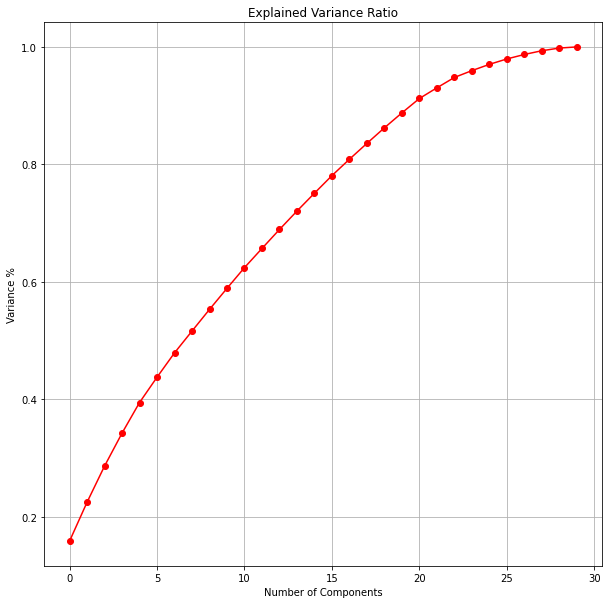

In [62]:
from sklearn.decomposition import PCA
pca = PCA()
#plot graph to find principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()

###### Comment - AS per the graph, we can see that 21 principal components attribute for 90% of variation in the data. We shall pick the first 21 components for our prediction

In [63]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scale)

In [64]:
principle_x=pd.DataFrame(x_new,columns=np.arange(21))

## Machine Learning Model Building

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1621, 21)
Training target vector size: (1621,)
Test feature matrix size: (695, 21)
Test target vector size: (695,)


### Finding Best Random state

In [ ]:
om sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.865359477124183 on Random_state 242


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=242, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.865359477124183


Confusion matrix of Logistics Regression : 
 [[324  44]
 [ 59 338]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       368
           1       0.88      0.85      0.87       397

    accuracy                           0.87       765
   macro avg       0.87      0.87      0.87       765
weighted avg       0.87      0.87      0.87       765



### Finding Optimal value of n_neighbors for kNN

In [75]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3429971702850177
RMSE value for k=  2 is: 0.27534885774967777
RMSE value for k=  3 is: 0.3448974461575688
RMSE value for k=  4 is: 0.31931298801289854
RMSE value for k=  5 is: 0.3560862053224121
RMSE value for k=  6 is: 0.33916467937944555
RMSE value for k=  7 is: 0.37399101733297235
RMSE value for k=  8 is: 0.3560862053224121
RMSE value for k=  9 is: 0.38433373297259976
RMSE value for k=  10 is: 0.3687108791699814
RMSE value for k=  11 is: 0.3791976393296807
RMSE value for k=  12 is: 0.3722392933359776
RMSE value for k=  13 is: 0.39107694443752145
RMSE value for k=  14 is: 0.38262936212236764
RMSE value for k=  15 is: 0.39934587037179503
RMSE value for k=  16 is: 0.39107694443752145
RMSE value for k=  17 is: 0.40260589075170505
RMSE value for k=  18 is: 0.39770583933420295
RMSE value for k=  19 is: 0.40422604172722165
RMSE value for k=  20 is: 0.39934587037179503
RMSE value for k=  21 is: 0.4106427291215469
RMSE value for k=  22 is: 0.39440531887330776
RMSE 

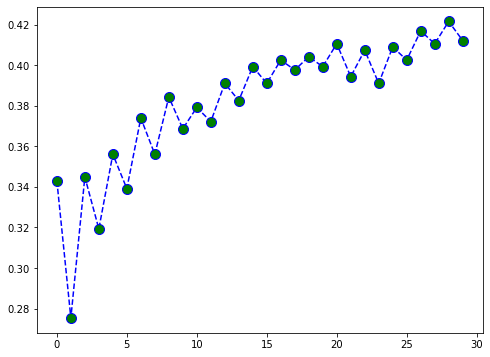

In [77]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(30), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

###### Comment-

*At k= 2, we get the minimum RMSE value which approximately 0.30032661958503204, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case*

### Applying other classification algorithm

In [78]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.9137254901960784


Confusion matrix : 
 [[342  26]
 [ 40 357]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       368
           1       0.93      0.90      0.92       397

    accuracy                           0.91       765
   macro avg       0.91      0.91      0.91       765
weighted avg       0.91      0.91      0.91       765



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8549019607843137


Confusion matrix : 
 [[319  49]
 [ 62 335]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       368
           1       0.87      0.84      0.86       397

    accuracy                           0.85       765
   macro avg       0.85      0.86      0.85       765
weighted avg       0.86      0.85      0.85       765




###### We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score. so we will continue further investigation with crossvalidation of above model

### Crossvalidation

In [79]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.62931034 0.68898488 0.69546436 0.66738661 0.6825054 ]
Mean Score : 0.672730319505474
Std deviation : 0.023623924887653754




Cross Validation Score SVC() :

Score : [0.59051724 0.65226782 0.587473   0.58099352 0.59395248]
Mean Score : 0.6010408132866611
Std deviation : 0.0259660374237405




Cross Validation Score GaussianNB() :

Score : [0.67025862 0.76025918 0.74514039 0.75809935 0.76673866]
Mean Score : 0.7400992403366351
Std deviation : 0.03561800448622431




Cross Validation Score DecisionTreeClassifier() :

Score : [0.68965517 0.89632829 0.87473002 0.87473002 0.89416847]
Mean Score : 0.8459223951739032
Std deviation : 0.07867355540467692




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.69612069 0.74298056 0.72138229 0.74298056 0.73650108]
Mean Score : 0.7279930364191555
Std deviation : 0.01778306547069584




Cross Validation Score RandomForestClassifier() :

Score : [0.67025862 0.96760259 

###### On basis of maximum score in crossvalidation of Random Forest Classifier. we will apply Hyperparameter tuning on Random Forest model

### Hyper Parameter Tuning : GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [82]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [83]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 100}

### Final Model

In [84]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8875816993464052


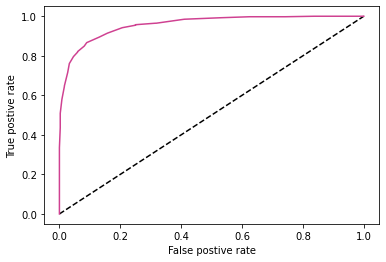

Auc Score :
 0.888412413755339


In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

### Saving model

In [87]:
import joblib
joblib.dump(Final_mod,'IBM_HR_Analytics_Final.pkl')

['IBM_HR_Analytics_Final.pkl']

***